# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [3]:
#get more information about the database

#columns
df.info()

#summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [4]:
#number of rows and cols
print("Shape: ")
print(df.shape)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df.nunique())

Shape: 
(1562, 19)

Missing values in each column:
country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year         

In [5]:
# let's take a look at example countries to get more insights
countries_of_interest = df[df['country'].isin(['Myanmar', 'Singapore'])]
countries_of_interest

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
954,Myanmar,2012,4.438940,8.330550,0.612250,56.765915,0.691094,0.625392,0.694739,0.764304,0.205414,NaN,-1.281897,-1.433521,1.732100,0.390206,NaN,0.381,0.461427
955,Myanmar,2013,4.175671,8.402433,0.756725,56.990059,0.775448,0.669334,0.637766,0.803302,0.217311,NaN,-1.300999,-1.306372,1.738796,0.416411,NaN,0.381,0.457943
956,Myanmar,2014,4.786247,8.470104,0.774267,57.178963,NaN,0.677773,0.591633,0.857965,0.111979,0.888816,-1.215787,-1.181873,1.471636,0.307472,NaN,0.381,0.427851
957,Myanmar,2015,4.223846,8.528501,0.752064,57.333050,0.807971,0.666991,0.633305,0.865906,0.271751,0.777452,-1.191993,-1.133446,1.620931,0.383757,0.381,0.381,0.411334
958,Myanmar,2016,4.623120,8.576414,0.793462,57.487133,0.877491,0.658644,0.607287,0.804010,0.301501,0.924319,-0.744201,-0.870932,1.850763,0.400328,NaN,0.381,0.426541
959,Myanmar,2017,4.154342,8.634504,0.795184,57.641220,0.886012,0.628706,0.618822,0.745647,0.282286,0.824177,NaN,NaN,2.233866,0.537718,NaN,0.381,0.424162
1217,Singapore,2006,6.462703,11.087921,0.904329,73.382545,0.756874,0.119886,NaN,0.750798,0.266721,0.905858,0.431533,1.934471,1.297670,0.200794,NaN,NaN,NaN
1218,Singapore,2007,6.833755,11.133461,0.920632,73.657242,0.866892,0.274598,0.063615,0.700188,0.114407,0.933893,0.405456,2.009301,1.306152,0.191132,NaN,NaN,NaN
1219,Singapore,2008,6.641957,11.097964,0.845259,73.976608,0.660659,0.027292,0.065775,0.720842,0.256087,0.908408,0.505373,2.039838,1.534524,0.231035,NaN,NaN,NaN
1220,Singapore,2009,6.144677,11.061752,0.866255,74.389771,0.776382,-0.092619,0.035198,0.499599,0.207548,0.973571,0.472613,1.958158,1.453645,0.236570,NaN,NaN,0.325021


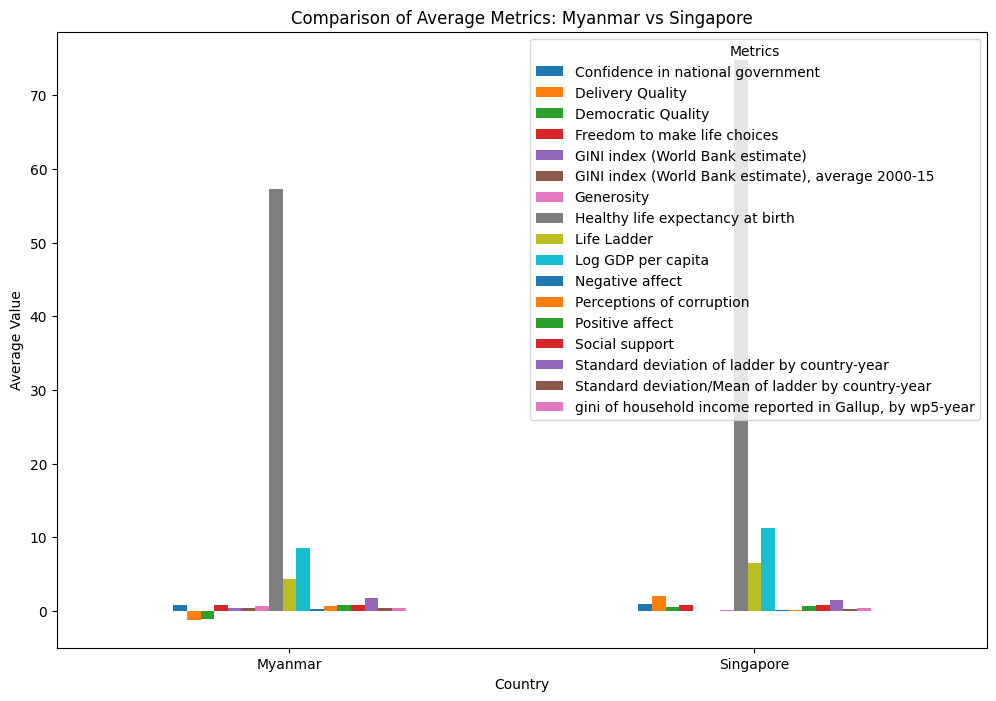

In [6]:
# Drop non-numeric columns for comparison
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.difference(['year'])

# Compute average values for key metrics
avg_metrics = countries_of_interest[numeric_columns].groupby(countries_of_interest['country']).mean()

# Plot comparison for selected features
plt.figure(figsize=(12, 8))
avg_metrics.plot(kind='bar', ax=plt.gca())
plt.title('Comparison of Average Metrics: Myanmar vs Singapore')
plt.ylabel('Average Value')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

In [7]:
avg_happiness_by_country = df[['country', 'Life Ladder']].dropna().groupby('country').mean()
# Sort the countries by the average 'Life Ladder' in descending order and get the top 5
top_5_happiest_countries = avg_happiness_by_country.sort_values(by='Life Ladder', ascending=False).head(5)

print("Top 5 Happiest Countries:")
print(top_5_happiest_countries)


Top 5 Happiest Countries:
             Life Ladder
country                 
Denmark         7.695679
Norway          7.564175
Switzerland     7.538719
Finland         7.523600
Netherlands     7.466844


I also want to explore furthermore by comparing happiness index across each continent. I am using an external API to manually map each country to their continent which will be the newly added column.

I am now happy enough with my explorations and insights. Now, let's get into the real ML problem!

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The chosen data set is the World Happiness Report (WHR) data set 
2. Prediction: The goal is to predict the happiness score of a country given other features such as the GDP. Label: The label for this problem is the "Life Ladder" score, which represents the overall happiness level of the country.

3. This is a supervised learning problem because we have a target label (happiness score) and we want to predict this label based on other features. Type of Problem: This is a regression problem because we are predicting a continuous numerical value (happiness score).

4. Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, GINI index (World Bank estimate), GINI index (World Bank estimate), average 2000-15, Gini of household income reported in Gallup, by wp5-year

5. It is useful for these purposes: 

Policy Making: Governments and policymakers can use predictions to assess and improve policies related to economic growth, social support, healthcare, and other factors affecting happiness and well-being. 

 Business Strategy: Companies operating globally can tailor their strategies based on predicted happiness levels. For example, companies might target markets where happiness and well-being are higher, potentially leading to more favorable consumer attitudes and increased market success.

 Social Impact: Non-governmental organizations (NGOs) and international agencies can use the predictions to identify countries in need of humanitarian aid and development programs, focusing resources on areas with lower predicted happiness scores.

 Benchmarking and Planning: Businesses and organizations can benchmark their performance against countries with high happiness scores and set targets for improving their own operations and employee satisfaction.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [8]:
df.isnull().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [9]:
#drop GINI index and household income columns - too many missing values
df = df.drop(columns=['GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year'])

Life Ladder                                          1.000000
Log GDP per capita                                   0.779476
Standard deviation/Mean of ladder by country-year    0.756076
Healthy life expectancy at birth                     0.729852
Delivery Quality                                     0.706673
Social support                                       0.700299
Democratic Quality                                   0.607034
Positive affect                                      0.554462
Freedom to make life choices                         0.526058
Perceptions of corruption                            0.425013
Negative affect                                      0.267492
Generosity                                           0.204910
GINI index (World Bank estimate), average 2000-15    0.172745
Standard deviation of ladder by country-year         0.154257
Confidence in national government                    0.085543
year                                                 0.014505
Name: Li

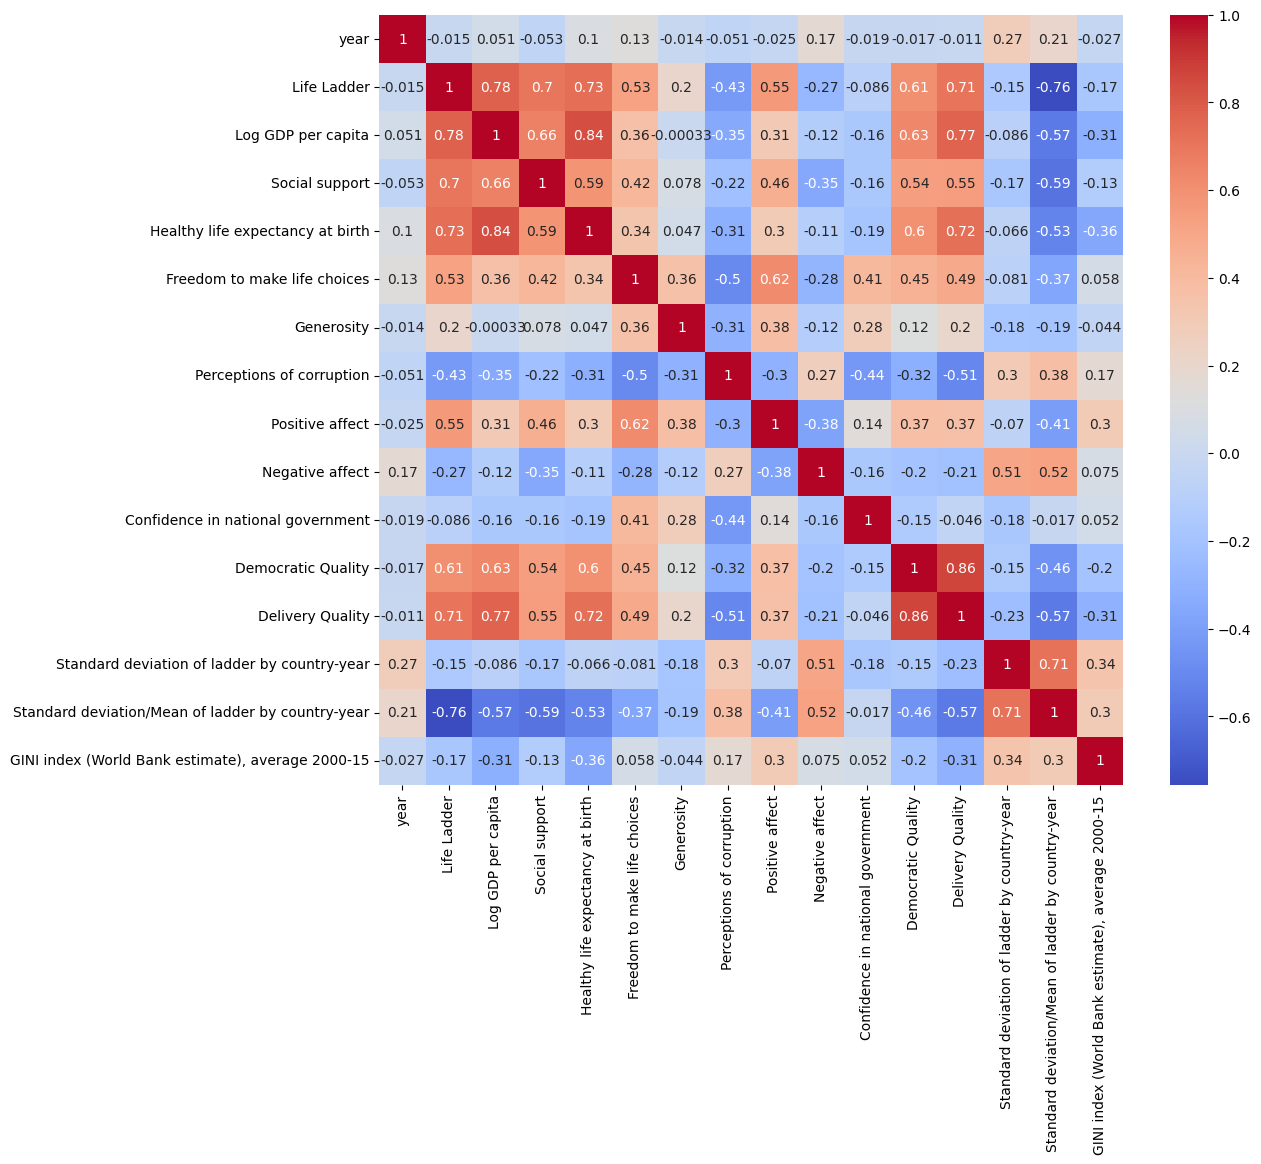

In [10]:
# to get rid of some features that are not really related
# compute the correlation matrix
corr_matrix = df.corr()

# extract correlations with the "Life Ladder" column
life_ladder_corr = corr_matrix["Life Ladder"]

# Sort the correlations
sorted_life_ladder_corr = life_ladder_corr.abs().sort_values(ascending=False)

# Print the most correlated features with "Life Ladder"
print(sorted_life_ladder_corr)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
#drop columns with very low correlation (under 0.1)
df = df.drop(['Confidence in national government', 'year', 'country'], axis=1)

In [12]:
print(df.columns)

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate), average 2000-15'],
      dtype='object')


In [13]:
df.isnull().sum()

Life Ladder                                            0
Log GDP per capita                                    27
Social support                                        13
Healthy life expectancy at birth                       9
Freedom to make life choices                          29
Generosity                                            80
Perceptions of corruption                             90
Positive affect                                       18
Negative affect                                       12
Democratic Quality                                   171
Delivery Quality                                     171
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI index (World Bank estimate), average 2000-15    176
dtype: int64

In [14]:
# Impute missing values with the mean of each column
df = df.fillna(df.mean())

In [15]:
#confirming everything is null now
df.isnull().sum()

Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
GINI index (World Bank estimate), average 2000-15    0
dtype: int64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I removed some features which have too many missing values or are the least correlated to our lable 'Life Ladder'.
2. For missing values of the remaining features, I replaced them with the mean values.
3. I will use the Linear Regression model.
4. I will split the data into test and train, and fit the model using Linear Regression fitting methods from scikit-learn. After predicting, I will use multiple evaluation methods such as mean squared error (MSE), MAE as an evaluation metric. For model improvements, I will try to use strategies such as hyperparameter tuning and cross-validation.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [17]:
X = df.drop(['Life Ladder'], axis = 1)
y = df['Life Ladder']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15"
1216,7.253018,0.652287,44.386528,0.710614,0.089226,0.848398,0.600368,0.495040,-0.126617,0.004947,2.595259,0.634606,0.371000
1240,10.268294,0.931166,69.974388,0.907441,-0.032928,0.893134,0.651521,0.285321,1.013064,0.922108,2.189200,0.362693,0.249091
774,10.044743,0.879372,65.109261,0.656393,-0.085117,0.808400,0.608380,0.228137,0.645110,0.860310,1.725923,0.293494,0.362000
1261,9.429125,0.839424,51.691589,0.714169,-0.088512,0.799543,0.772518,0.166549,0.277204,0.236592,1.963117,0.536264,0.622500
859,10.052950,0.830900,64.757324,0.791310,0.245237,0.755383,0.736497,0.316552,-0.143944,0.605612,2.149710,0.372554,0.461000


In [19]:
y_train.head()

1216    4.089562
1240    6.035964
774     5.880598
1261    3.660727
859     5.770200
Name: Life Ladder, dtype: float64

In [20]:
# Initialize and fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# Predict on test data
y_pred = lr_model.predict(X_test)

In [32]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(0.21398174754739746,
 0.083139405365766,
 0.2883390458570708,
 0.9356999968992291)

In [37]:
cv_scores = cross_val_score(lr_model, X, y, cv=5)
mean_cv_score = cv_scores.mean()
mean_cv_score

0.9132165606653724

## Error Analysis
Mean Absolute Error (MAE): 0.21398

Interpretation: Our model's predictions are off by approximately 0.214 units from the actual values. MAE provides a straightforward measure of prediction accuracy.

Mean Squared Error (MSE): 0.08314

Interpretation: MAE penalizes larger errors more heavily. A lower MSE indicates fewer large errors in our predictions.

Root Mean Squared Error (RMSE): 0.28834

Interpretation: This represents the typical magnitude of the prediction errors. Lower RMSE values indicate better model performance.

R-squared (R2): 0.93570

Interpretation: About 93.6% of the variance in the target variable (Life Ladder) is explained by the features in our model. This is a high R-squared value, suggesting that our model does a very good job of explaining the variability in the target variable.

Overall Interpretation:

Error Metrics: The MAE and RMSE values suggest that while our model does make some errors, they are relatively small. RMSE being higher than MAE indicates that there are some larger errors, but they are not dominating the error distribution.

R-squared Value: A high R-squared value indicates that our model explains a significant portion of the variance in the target variable. This suggests that the model fits the data well.
In summary, these metrics suggest that our linear regression model performs quite well, with low errors and a high proportion of explained variance.

Our model is not too complex, and the relationship between the features and the label seem pretty straightforward too. In a scenario like this, Linear Regression models performs pretty well and this might explain why.

## Conclusion

In summary, we have produced a robust approach for predicting the Life Ladder, a key indicator of happiness and well-being across countries. By utilizing Linear Regression, which demonstrated a high R² score and reliable predictions, we have crafted a model capable of offering valuable insights into the factors contributing to global happiness. The model’s performance underscores its potential utility for policymakers, researchers, and organizations aiming to enhance quality of life worldwide. Accurate predictions of happiness levels can inform targeted interventions, improve social policies, and guide economic strategies to foster well-being on a global scale. As we move forward, this model not only provides a snapshot of current happiness trends but also offers a foundation for ongoing research and refinement, driving future efforts to better understand and improve human flourishing across diverse populations.

## Implementation in Practice:
Data Input:

Regular Updates: Data for features like GDP per capita, social support, and health metrics can be collected regularly from reliable sources (e.g., national statistics databases or international reports). This data is updated periodically to reflect current conditions.

Scenario Analysis:

Simulation: Stakeholders can use the model to simulate different scenarios. For example, they can input hypothetical changes in economic conditions or social policies to predict their effects on national happiness.
Decision Making:

Evidence-Based Decisions: The predictions generated by the model help in making informed decisions. By understanding how changes in different features impact happiness, decision-makers can prioritize actions that are likely to have the most significant positive effect on well-being.

### Author's Note

I, Linn Khant Thuya, have put in time and effort to create this notebook and the model. Please feel free to utilize this notebook for educational or any purposes of good intention.